# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [26]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

with open("token.txt", "r") as f:
    px.set_mapbox_access_token(f.read())

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

import warnings

warnings.filterwarnings("ignore")


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

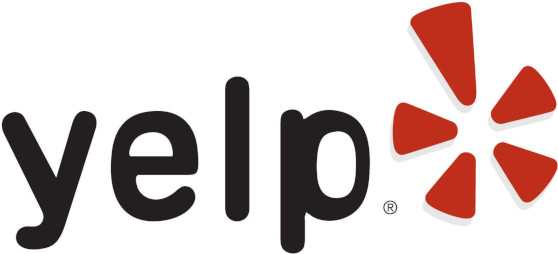

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.* 

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [28]:
yelp_business = pd.read_csv("yelp_business.csv").drop("Unnamed: 0", axis=1)
yelp_business.head(5)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

На всякий случай, сначала нужно почистить данные:   
1) удалим кавычки  
2) приведем названия городов к единому регистру (str.title() - с заглавной буквы)  
3) удалим возможные пробелы в начале\конце слова
4) удалим возможные знаки препинания (запятые, точки). Например, я замечал города "Las Vegas," , "N. Las Vegas", "N Las Vegas", "Las Vegas, Nv"
5) удалим цифры (видел город "110 Las Vegas")
6) приведем типичные слова - географические направления (вида "North", "N") к единому формату
Для бейзлайна этого, думаю, будет достаточно, но возможно, стоит еще поисправлять точечные опечатки (например, я видел город "Las Vegass")

In [29]:
yelp_business["name"] = yelp_business["name"].apply(
    lambda x: x.replace('"', "")
)
yelp_business["address"] = yelp_business["address"].apply(
    lambda x: x.replace('"', "")
)


def prepare_cities(x):
    """
    Метод для предобработки столбца cities
    """
    x = x.title().strip().replace(".", "").split(",")[0]
    x = "".join((ch for ch in x if not ch.isdigit()))
    for direction, d in zip(
        ["East", "West", "South", "North"], ["E", "W", "S", "N"]
    ):
        if direction in x:
            x = f"{d} {x.replace(direction, '')}"
    return x


yelp_business = yelp_business.rename(columns={"city": "Город"})
yelp_business["Город"] = (
    yelp_business["Город"].astype(str).apply(prepare_cities)
)
cities = (
    yelp_business[["business_id", "Город"]]
    .groupby("Город")
    .count()
    .rename(columns={"business_id": "Кол-во компаний"})
    .sort_values(by="Кол-во компаний", ascending=False)
)
cities.head(5)

,Кол-во компаний
Город,
Las Vegas,26811
Phoenix,17216
Toronto,17212
Charlotte,8554
Scottsdale,8229


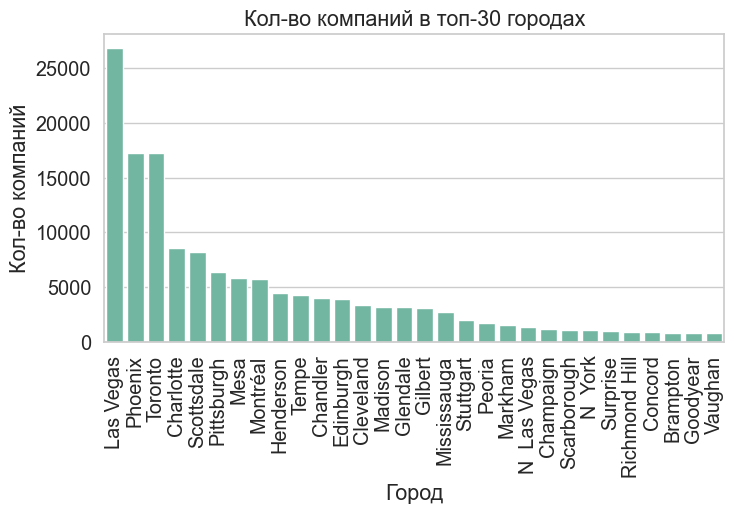

In [30]:
plt.figure(figsize=(8, 4))
sns.barplot(cities[:30], x="Город", y="Кол-во компаний").set(
    title="Кол-во компаний в топ-30 городах"
)
plt.xticks(rotation=90)
plt.show()

Больше всего компаний оказаось в Лас Вегасе. Проверим, достаточно и хорошо удалось почистить данные  
Сначала я заметил, что Las Vegas и North Las Vegas отмечены как разные города, и подумал, что их стоит объединить (как, возможно, и длля других городов). Однако оказалось, что это действительно разные города:  
*Норт-Лас-Ве́гас или Се́верный Лас-Ве́гас — город в округе Кларк, расположенный в агломерации Лас-Вегаса.*  
*North Las Vegas isn't just the northern part of Las Vegas; it's its own city.*  
С учетом этого, данные можно считать относитеьно чистыми

In [31]:
cities[cities.index.str.contains("Las Vegas")]

,Кол-во компаний
Город,
Las Vegas,26811
N Las Vegas,1393
N Las Vegas,33
S Las Vegas,4
W Las Vegas,1
Las Vegas,1
E Las Vegas,1
Lake Las Vegas,1
Henderson And Las Vegas,1


Пусть `N` &mdash; город с наибольшим количеством компаний (Лас Вегас). Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

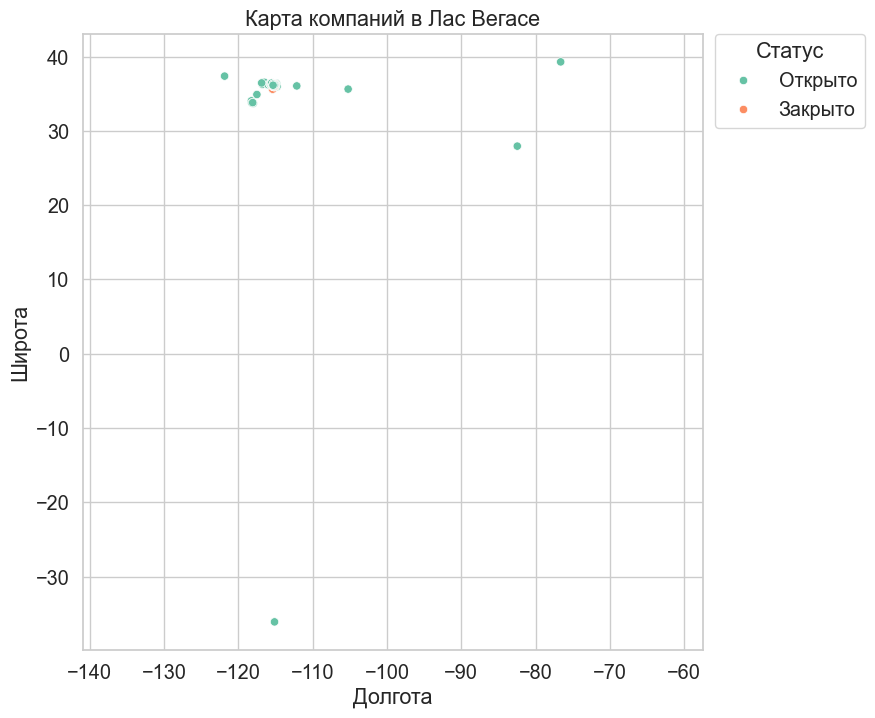

In [32]:
yelp_business = yelp_business.rename(columns={"is_open": "Статус"})
yelp_business["Статус"] = yelp_business["Статус"].apply(
    lambda x: ["Закрыто", "Открыто"][x]
)
yelp_las_vegas = yelp_business[
    yelp_business["Город"].isin(["Las Vegas", "Las Vegass"])
]
plt.figure(figsize=(8, 8))
plt.axis("equal")
sns.scatterplot(yelp_las_vegas, x="longitude", y="latitude", hue="Статус").set(
    title="Карта компаний в Лас Вегасе", xlabel="Долгота", ylabel="Широта"
)
plt.legend(
    title="Статус", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0
)
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

Действительно, при приближении карты стала видна регуярная решетка улиц. Границы широты\долготы подобрал на глаз

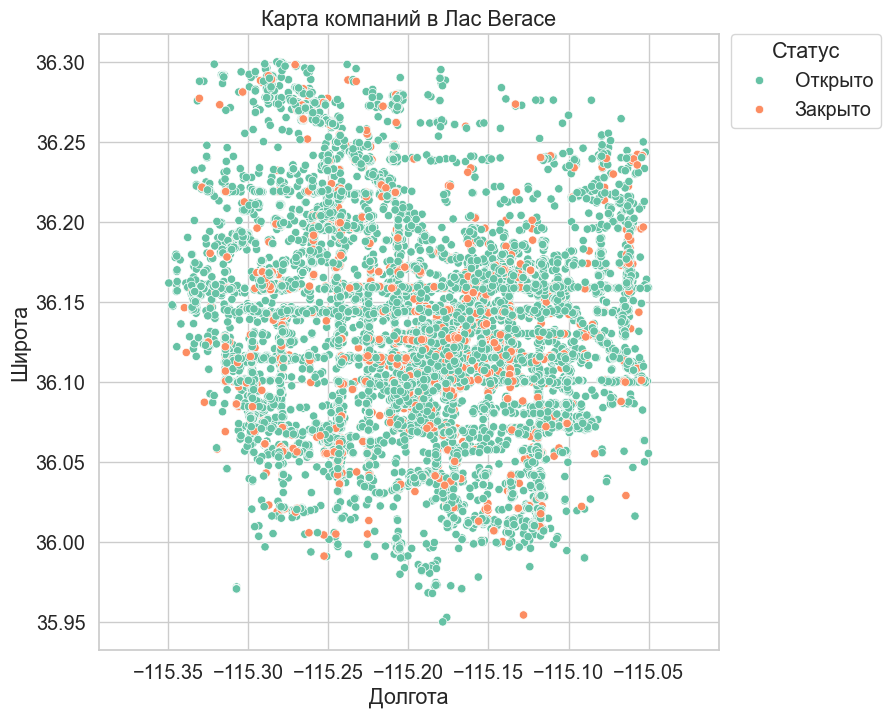

In [33]:
yelp_las_vegas_cropped = yelp_las_vegas[
    (yelp_las_vegas.latitude > 35.95) & (yelp_las_vegas.latitude < 36.30)
    & (yelp_las_vegas.longitude > -115.35) & (yelp_las_vegas.longitude < -115.05)
]
plt.figure(figsize=(8, 8))
plt.axis("equal")
sns.scatterplot(
    yelp_las_vegas_cropped, x="longitude", y="latitude", hue="Статус"
).set(
    title="Карта компаний в Лас Вегасе",
    xlabel="Долгота",
    ylabel="Широта",
)
plt.legend(
    title="Статус", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0
)
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [34]:
yelp_las_vegas = yelp_las_vegas.rename(
    columns={
        "latitude": "Широта",
        "longitude": "Долгота",
        "name": "Название",
        "categories": "Категории",
    }
)
fig = px.scatter_mapbox(
    yelp_las_vegas,
    lat="Широта",
    lon="Долгота",
    color="Статус",
    hover_name="Название",
    title="Карта компаний в Лас Вегасе",
    color_discrete_map={"Закрыто": "orange", "Открыто": "green"},
    size_max=15,
    zoom=10,
)
# fig.show()
fig.write_html("1.Карта компаний в Лас Вегасе.html")  # прикрепил отдельным файлом

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [35]:
yelp_review = pd.read_csv("yelp_review.csv", usecols=["business_id", "stars"])
yelp_review.head(5)

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [36]:
yelp_review = yelp_review.set_index("business_id")
print(f"Кол-во компаний: {len(yelp_review)} -> ", end="")
yelp_review = yelp_review.loc[yelp_las_vegas.business_id]
yelp_review = yelp_review.reset_index()
print(len(yelp_review))

Кол-во компаний: 5261668 -> 1605420


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [37]:
business_ratings = yelp_review.groupby("business_id")["stars"].aggregate(
    [np.mean, np.size]
)

Думаю, стоит проверить, что оценки лежат в диапазоне [1,5] (да, все ок)

In [38]:
business_ratings["mean"].min(), business_ratings["mean"].max()

(1.0, 5.0)

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [39]:
business_ratings = business_ratings.rename(
    columns={"mean": "Средняя оценка", "size": "Кол-во оценок"}
)
business_ratings["Средняя оценка"] = business_ratings["Средняя оценка"].round(2)
business_ratings.sample(5)

,Средняя оценка,Кол-во оценок
business_id,,
o1Z17pBpJ_QG122PLrQEsA,2.50,6
Kvk--WoVONE6yQ1pN078_Q,3.91,92
kca4vhZOuOHJfyC1teFimA,3.92,12
8G3XhFQGSWRPk2Mva9jkDA,3.53,66
qxYaNE7KdXCeCnjD-D83FQ,4.67,52


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [40]:
yelp_las_vegas = yelp_las_vegas.set_index("business_id")[
    ["Широта", "Долгота", "Категории", "Название"]
]
yelp_las_vegas = yelp_las_vegas.join(
    business_ratings, on="business_id", how="left"
)
yelp_las_vegas.head(5)

,Широта,Долгота,Категории,Название,Средняя оценка,Кол-во оценок
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,BDJ Realty,4.00,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,Soccer Zone,1.44,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,Alfredo's Jewelry,4.74,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,Task Electric,4.45,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,Star Nursery,3.68,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [41]:
fig = px.scatter_mapbox(
    yelp_las_vegas,
    lat="Широта",
    lon="Долгота",
    color="Средняя оценка",
    hover_name="Название",
    title="Рейтинг компаний в Лас Вегасе",
    color_continuous_scale=px.colors.diverging.Geyser_r,
    size_max=15,
    zoom=10,
    opacity=0.3,
)
# fig.show()
fig.write_html("2.Рейтинг компаний в Лас Вегасе.html")  # прикрепил отдельным файлом

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [42]:
yelp_las_vegas["lat_rounded"] = (
    np.round(yelp_las_vegas["Широта"] * 4, decimals=1) * 0.25
)
yelp_las_vegas["lng_rounded"] = (
    np.round(yelp_las_vegas["Долгота"] * 4, decimals=1) * 0.25
)
yelp_las_vegas.head(5)

,Широта,Долгота,Категории,Название,Средняя оценка,Кол-во оценок,lat_rounded,lng_rounded
business_id,,,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,BDJ Realty,4.00,5,36.200,-115.275
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,Soccer Zone,1.44,9,36.200,-115.250
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,Alfredo's Jewelry,4.74,23,36.075,-115.125
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,Task Electric,4.45,20,36.050,-115.275
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,Star Nursery,3.68,25,36.100,-115.050


Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

Проблема заключается в том, что у компаний разное количство оценок. Пусть у компании А - 10 оценок и среднее 5, а у компании В - 100 оценок и среднее 4. Тогда среднее по всем оценкам всех компаний M1 = (5\*10 + 4\*100)/(10+100) = 4.09, а среднее по средним оценкам компаний M2 = (5 + 4)/2 = 4.5. Получается, первый способ выдает искаженное значение, дающее больший вес "более популярным" местам (местам с бОльшим количеством отзывов), а не "более качественным". Значит, следует использовать второй способ подсчета, чтобы оценить "среднее качество" компаний в районе, без поправки на популярность

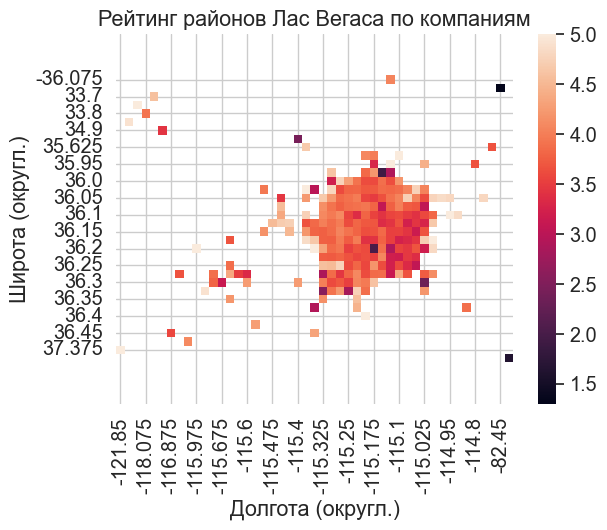

In [43]:
plt.axis("equal")
pivot = pd.pivot_table(
    yelp_las_vegas,
    index="lat_rounded",
    columns="lng_rounded",
    values="Средняя оценка",
    aggfunc=np.mean,
)
sns.heatmap(pivot).set(
    title="Рейтинг районов Лас Вегаса по компаниям",
    xlabel="Долгота (округл.)",
    ylabel="Широта (округл.)",
)
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** 1) чем меньше в районе компаний, тем выше погрешность рейтинга района. При очень малых количествах компаний в районе ситуация становится критчиной, оценка района становится крайне подвержена выбросам, и делать выводы по таким данным становится сложнее. 2) если оценки районов лежат в узком диапазоне, автоматическая подстройка цветовой гаммы может создать ошибочное впечатление, будто оценки районов сильно отличаются, хотя никакой значимой разницы нет. Похожий пример из астрономии - тепловая карта [реликтового излучения](https://en.wikipedia.org/wiki/Cosmic_microwave_background#/media/File:Ilc_9yr_moll4096.png). На первый взгляд кажется, что карта отображает значительные перепады уровня излучения, но на самом деле реликтовое излучение крайне равномерно

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

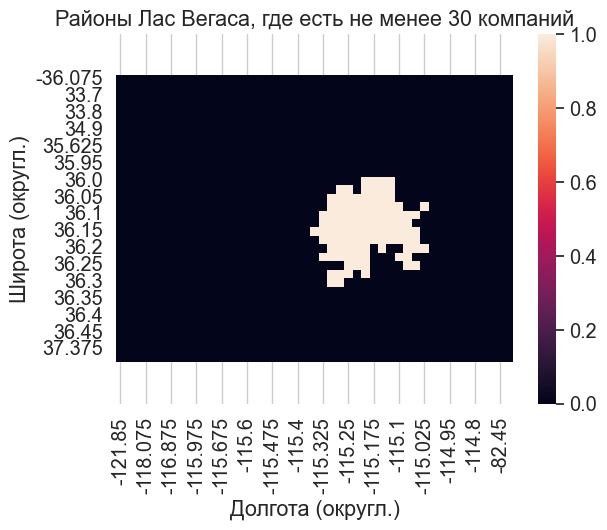

In [44]:
yelp_las_vegas = yelp_las_vegas.reset_index()
pivot_num_companies = (
    pd.pivot_table(
        yelp_las_vegas,
        index="lat_rounded",
        columns="lng_rounded",
        values="business_id",
        aggfunc=len,
    )
    > 29
)
plt.axis("equal")
sns.heatmap(pivot_num_companies).set(
    title="Районы Лас Вегаса, где есть не менее 30 компаний",
    xlabel="Долгота (округл.)",
    ylabel="Широта (округл.)",
)
plt.show()

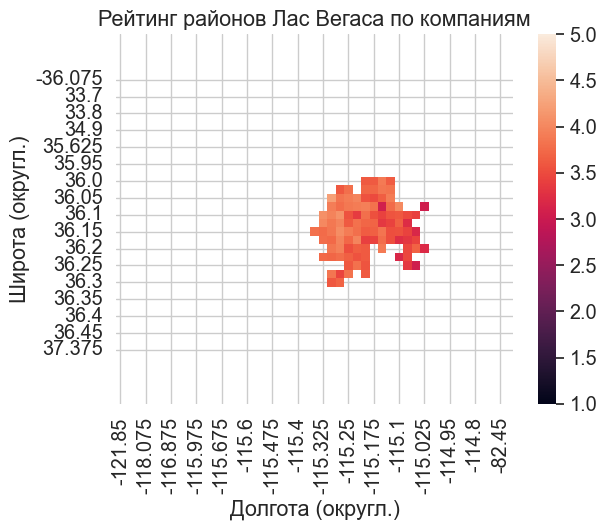

In [45]:
pivot = pd.pivot_table(
    yelp_las_vegas,
    index="lat_rounded",
    columns="lng_rounded",
    values="Средняя оценка",
    aggfunc=np.mean,
)[pivot_num_companies]
plt.axis("equal")
sns.heatmap(pivot, vmin=1, vmax=5).set(
    title="Рейтинг районов Лас Вегаса по компаниям",
    xlabel="Долгота (округл.)",
    ylabel="Широта (округл.)",
)
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** масштаб по осям был сохранен, чтобы было нагляднее сравнивать графики. Действительно, ограничение на минимальный размер выборки при подсчете рейтинга районов сделало график более репрезентативным. Видно, что в основном оценки - нейтральные, а очень низкие\высокие баллы - редкость. Действительно, бизнес, клиенты которого недовольны, быстро приходит в упадок, а бизнес, клиенты которого довольны на 100% - большая редкость

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [46]:
yelp_las_vegas["Категории"] = yelp_las_vegas["Категории"].apply(
    lambda x: x.lower()
)
restaurants_las_vegas = yelp_las_vegas[
    (yelp_las_vegas["Кол-во оценок"] >= 5)
    & (yelp_las_vegas["Категории"].str.contains("restaurant"))
]
restaurants_las_vegas.head(3)

,business_id,Широта,Долгота,Категории,Название,Средняя оценка,Кол-во оценок,lat_rounded,lng_rounded
6,Pd52CjgyEU3Rb8co6QfTPw,36.066914,-115.170848,nightlife;bars;barbeque;sports bars;american (...,Flight Deck Bar & Grill,3.77,13,36.075,-115.175
7,4srfPk1s8nlm1YusyDUbjg,36.064652,-115.118954,fast food;restaurants;sandwiches,Subway,2.67,6,36.075,-115.125
8,n7V4cD-KqqE3OXk0irJTyA,36.068259,-115.178877,arcades;arts & entertainment;gastropubs;restau...,GameWorks,3.12,349,36.075,-115.175


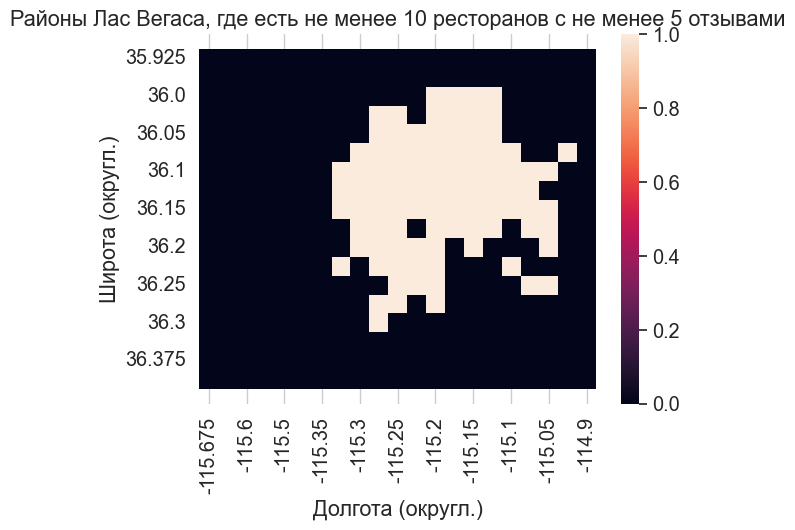

In [47]:
pivot_num_rests = (
    pd.pivot_table(
        restaurants_las_vegas,
        index="lat_rounded",
        columns="lng_rounded",
        values="business_id",
        aggfunc=len,
    )
    > 9
)
plt.axis("equal")
sns.heatmap(pivot_num_rests).set(
    title="Районы Лас Вегаса, где есть не менее 10 ресторанов с не менее 5 отзывами",
    xlabel="Долгота (округл.)",
    ylabel="Широта (округл.)",
)
plt.show()

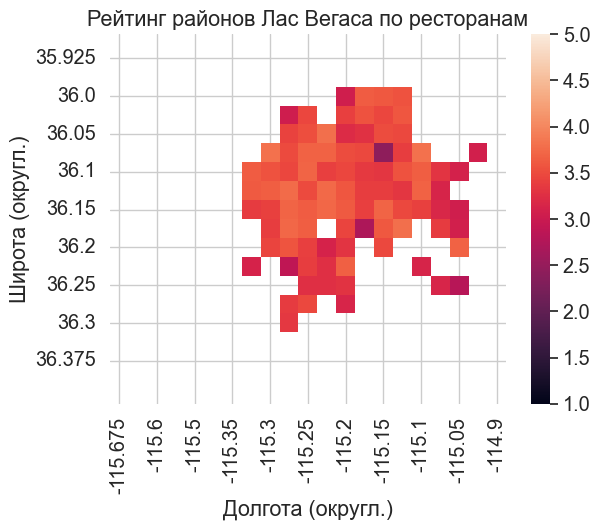

In [48]:
pivot = pd.pivot_table(
    restaurants_las_vegas,
    index="lat_rounded",
    columns="lng_rounded",
    values="Средняя оценка",
    aggfunc=np.mean,
)[pivot_num_rests]
plt.axis("equal")
sns.heatmap(pivot, vmin=1, vmax=5).set(
    title="Рейтинг районов Лас Вегаса по ресторанам",
    xlabel="Долгота (округл.)",
    ylabel="Широта (округл.)",
)
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** мы отсеяли "ненадежные" оценки - т.е. средние баллы ресторанов, полученные усрдннием по малому числу отзывов, и баллы районов, полученные усрднним малого чиса ресторанов. По сути, мы отсеялли выбросы, оставив только достоверные данные, по которым уже можно длать содержательные выводы

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [49]:
restaurants_for_basil = (
    restaurants_las_vegas[restaurants_las_vegas["Кол-во оценок"] >= 50]
    .sort_values(by="Средняя оценка", ascending=False)[
        [
            "Название",
            "Категории",
            "Широта",
            "Долгота",
            "Средняя оценка",
            "Кол-во оценок",
        ]
    ]
    .reset_index()
    .drop("index", axis=1)
)
restaurants_for_basil.head(10)

,Название,Категории,Широта,Долгота,Средняя оценка,Кол-во оценок
0,Lip Smacking Foodie Tours,food tours;restaurants;event planning & servic...,36.114537,-115.172678,4.97,179
1,Pepito Shack,restaurants;burgers;food stands;sandwiches;hot...,36.152477,-115.151945,4.91,65
2,Bosa Boba Cafe,vietnamese;bubble tea;sandwiches;food;coffee &...,36.125960,-115.184846,4.89,55
3,Garden Grill,tacos;street vendors;farmers market;vegetarian...,36.166783,-115.286197,4.87,91
4,Brew Tea Bar,cafes;tea rooms;food;bubble tea;restaurants;de...,36.054195,-115.242443,4.85,1165
5,Poppa Naps BBQ,food stands;hot dogs;caterers;restaurants;amer...,36.116549,-115.088115,4.84,104
6,Zenaida's Cafe,restaurants;breakfast & brunch;cafes,36.101741,-115.100359,4.83,180
7,El Frescos Cocina Mexicana,caterers;mexican;restaurants;food;event planni...,36.098527,-115.148446,4.82,191
8,Smooth Eats,juice bars & smoothies;restaurants;sandwiches;...,36.167894,-115.140238,4.81,57
9,California Sushi Burrito,asian fusion;fast food;restaurants;japanese;po...,36.125636,-115.202487,4.81,57


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [50]:
restaurants_for_basil["Топ-10"] = restaurants_for_basil.index < 10
restaurants_for_basil["hover"] = (
    restaurants_for_basil["Название"]
    + ": "
    + restaurants_for_basil["Средняя оценка"].round(2).astype(str)
    + "☆"
)
fig = px.scatter_mapbox(
    restaurants_for_basil[restaurants_for_basil["Средняя оценка"] >= 4.7],
    lat="Широта",
    lon="Долгота",
    color="Топ-10",
    hover_name="hover",
    title="Подборка ресторанов в Лас Вегасе",
    color_discrete_map={True: "red", False: "Orange"},
    size_max=15,
    zoom=10,
)
# fig.show()
fig.write_html("3.Подборка ресторанов в Лас Вегасе.html")  # прикрепил отдельным файлом

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** 1) кот Василий, вероятно, потомок кота Базилио, разбогатевшего на поле чудес  
2) в ходе задачи удалось провести подробный анализ компаний в район Лас-Вегаса. Вероятно, больше всего компаний из датасета расположно в этом городе, потому что город или штат предоставляет упрощенное\сниженное налогообложение, что притягивает предпринимателей. По расположнию компаний удалось пронаблюдать решетчатую структуру застройки. В итоге, удалось составить подборку лучших ресторанов Лас Вегаса  